<a href="https://colab.research.google.com/github/fonsecajr/Projects/blob/master/A%C3%A7%C3%B5es_Analises2_porfolio_x_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=7559e311df9126aca5fbe3eece90eb4d8c615e414ac42d05241fc6fe30e67cc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-cm0uur90/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
tickers = ["ITUB3.SA","ITUB4.SA", "ITSA3.SA", "ITSA4.SA"]
portfolio = yf.download(tickers, period="5y")["Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [12]:
ibov = yf.download("^BVSP", period="5y")["Adj Close"] 

[*********************100%***********************]  1 of 1 completed


In [13]:
portfolio, ibov

(             ITSA3.SA  ITSA4.SA   ITUB3.SA   ITUB4.SA
 Date                                                 
 2015-05-12   5.679765  5.745818  15.013877  16.781778
 2015-05-13   5.620596  5.638643  14.996689  16.666710
 2015-05-14   5.632432  5.686276  15.061206  16.830490
 2015-05-15   5.744842  5.745818  15.340974  17.144880
 2015-05-18   5.614683  5.674369  15.108614  16.688807
 ...               ...       ...        ...        ...
 2020-05-06  10.240000  8.700000  21.500000  22.240000
 2020-05-07   9.970000  8.290000  20.799999  21.440001
 2020-05-08  10.190000  8.490000  21.340000  22.320000
 2020-05-11  10.060000  8.490000  21.709999  22.469999
 2020-05-12   9.670000  8.180000  20.900000  21.610001
 
 [1242 rows x 4 columns], Date
 2015-05-12    56792.000000
 2015-05-13    56372.000000
 2015-05-14    56657.000000
 2015-05-15    57249.000000
 2015-05-18    56204.000000
                   ...     
 2020-05-06    79064.000000
 2020-05-07    78119.000000
 2020-05-08    80263.000000


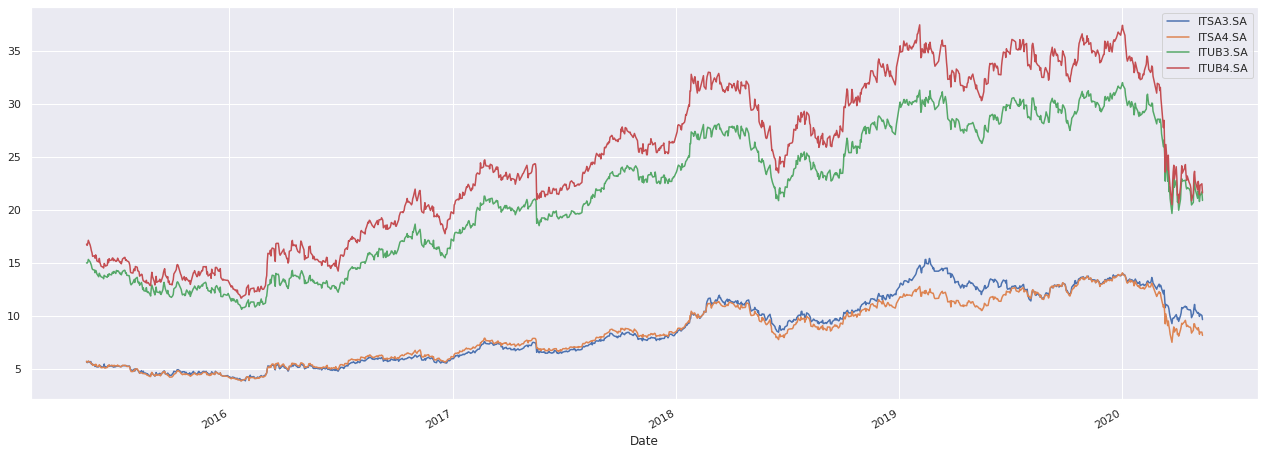

In [18]:
sns.set()
portfolio.plot(figsize=(22,8))

In [20]:
portfolio_normalized = (portfolio / portfolio.iloc[0])*10000
portfolio_normalized

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA
Date,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553
...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740


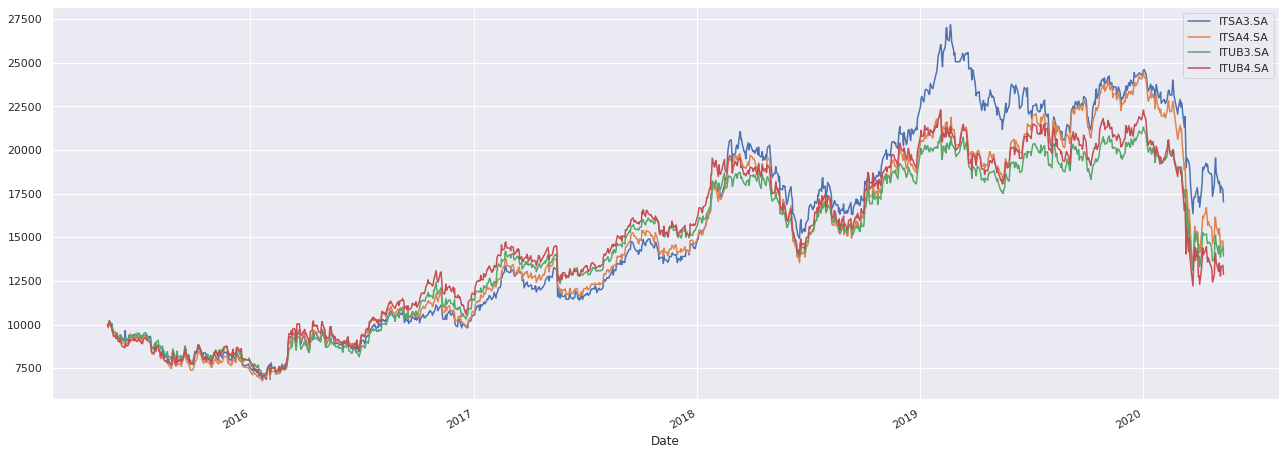

In [27]:
portfolio_normalized.plot(figsize=(22,8))

In [28]:
portfolio_normalized["Results"] = portfolio_normalized.sum(axis=1)
portfolio_normalized

,ITSA3.SA,ITSA4.SA,ITUB3.SA,ITUB4.SA,Results
Date,,,,,
2015-05-12,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2015-05-13,9895.826075,9813.473243,9988.551876,9931.432514,39629.283708
2015-05-14,9916.664218,9896.374669,10031.523469,10029.026588,39873.588945
2015-05-15,10114.576626,10000.000000,10217.863075,10216.366795,40548.806496
2015-05-18,9885.414979,9875.651595,10063.099660,9944.599553,39768.765787
...,...,...,...,...,...
2020-05-06,18028.915327,15141.447784,14320.085426,13252.469033,60742.917570
2020-05-07,17553.544398,14427.885552,13853.849579,12775.761964,58611.041492
2020-05-08,17940.883176,14775.964487,14213.517450,13300.139740,60230.504853


In [64]:
ibov_normalized = (ibov / ibov.iloc[0])*40000
ibov_normalized

Date
2015-05-12    40000.000000
2015-05-13    39704.183688
2015-05-14    39904.916185
2015-05-15    40321.876321
2015-05-18    39585.857163
                  ...     
2020-05-06    55686.716439
2020-05-07    55021.129737
2020-05-08    56531.201578
2020-05-11    55687.420763
2020-05-12    54847.128557
Name: Adj Close, Length: 1236, dtype: float64

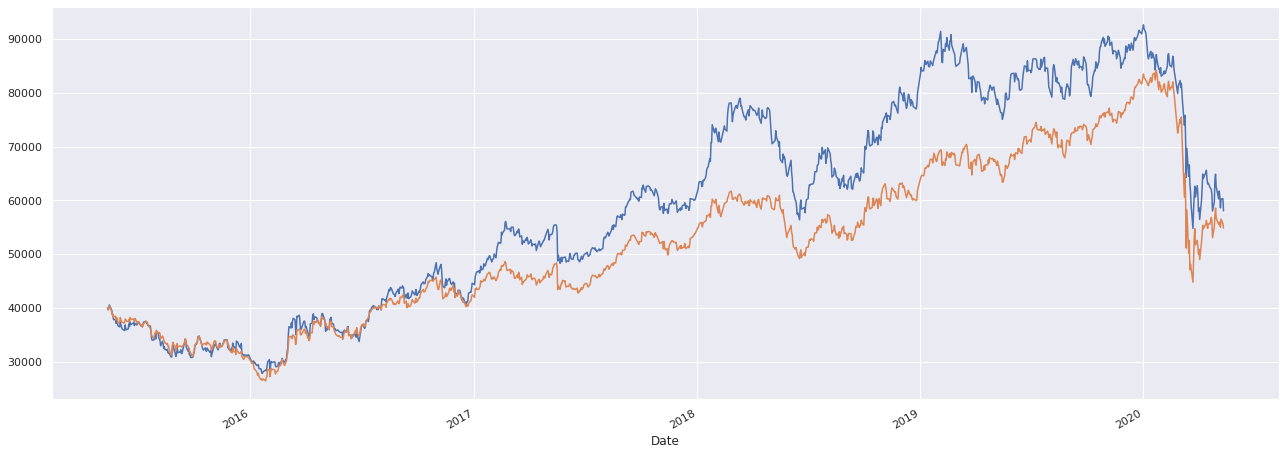

In [69]:
portfolio_normalized["Results"].plot(figsize=(22,8))
ibov_normalized.plot()